In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../class_10/fashion-mnist_test.csv")
x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0
X = X.reshape((-1,28,28,1))
y = np_utils.to_categorical(y)
print (X.shape, y.shape)

((10000, 28, 28, 1), (10000, 10))


In [6]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
__________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
hist = model.fit(X,y, epochs=20, shuffle=True, batch_size=64, validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 10s 1ms/step - loss: 1.0198 - acc: 0.6231 - val_loss: 0.7030 - val_acc: 0.7425
Epoch 2/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6105 - acc: 0.7626 - val_loss: 0.6488 - val_acc: 0.7785
Epoch 3/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5342 - acc: 0.7955 - val_loss: 0.5396 - val_acc: 0.8215
Epoch 4/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4829 - acc: 0.8137 - val_loss: 0.5033 - val_acc: 0.8395
Epoch 5/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4271 - acc: 0.8365 - val_loss: 0.4475 - val_acc: 0.8580
Epoch 6/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.3902 - acc: 0.8565 - val_loss: 0.4466 - val_acc: 0.8540
Epoch 7/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.3701 - acc: 0.8616 - val_loss: 0.4372 - val_acc: 0.8440
Epoch 8/20
80

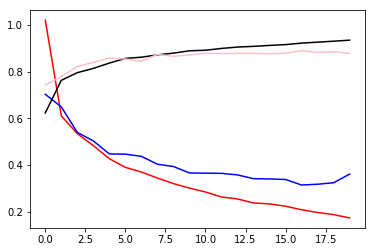

In [9]:
cLlclJaWNghiX+Hc3H3l5eUtPk9cXBzdunUjKSmJpKQk+vXrx8iRI0lKSmpwv6/9uLg4IiLapzc8tMMd6k+qKqXChrWWQ4cOsW/fPvLz89m3b19dyc/P5/Dhwz5b1M21mgFiYmJITEysC93ExETS09Pr9j1b733vbUJCApGRke30Khyf8Aj3JUtkxIwxTtdGKeWDtZby8nJKSkooKipi//79PoPbc19+fj7V1dVHfZ9OnTrRs2fPupZwv379OOmkk3yGsq+Ajo2NdeCnd0Z4hHtJCezeDX37Ol0bpcKGtZaKiooGfdBFRUUUFxdTXFxMSUnJUaWp+0tLS3G5XD6fJyIigtTUVNLS0khLS2PEiBF1+2lpafTs2bNuPzExEaONOL+ER7iD9LtruKsOzuVyUV5eTllZ2VGltLS0br9xYHtCu/F9vlrPjcXExBAfH9+gdO/enX79+h11f3x8PAkJCQ3CPDk5OWS6OkJJeIX7eec5WxelAqC6upoDBw6wf/9+CgoK2L9/f4NSUFBAaWlpg7D2FH9OCHpERESQkJBAYmJi3bZXr14MGzasrlvDV0lISCAhIaEurGNiYtrw1VDHKvTDvXt3SEvTETMqqNXW1pKfn8/u3bvJy8s7KrC9y6FDh3x+j8jISFJTU0lJSSEhIYGkpCTS09Pp2rUrcXFxdO3ata40vt34vsTEROLi4rSLI4yFfriDXMyk4a4cYq2loKCA3bt3Nyh5eXl1+3v27KGmpuaor+3evTupqamkpqaSlZXFWWedVXe7cUlKSmq3YXQq9IVHuGdlwbPPgssF+uZXfrDWUlVVxZEjR3yWioqKJh8rLS1lz549DUK8srKywfePjo6mT58+ZGRkcMYZZ5CRkVFX+vTpQ1paGikpKURHRzv0CoSw2lr5O9dPHc0Kn3AvK4Ndu6B/f6dro4KAtZb8/Hxyc3PZsmULubm5dfs7duygrKysxTHRTYmMjKR3795kZGSQnZ3NRRdd1CC4MzIySE1N1Vb28bAWqqqhvALKj8i2zL1fXSPBHhsDnbxKbKNtW52kDZFh1+ET7iAXM2m4dyiHDh2qC2/vEM/NzaWkpKTuuOjoaAYOHMiQIUOYNGkS8fHxdO7cmdjYWDp37uyzNPVYTEyM9lUHirVQUVkf3OUV9aW2tv64yEjoEgvJiRAbCzU1UFklpbAYKn2M6omKavgPoG4/Wp63xiXPUevZ1nrd576/pvboY1xW6tMpGmKi5XvGRLtve+9HO9qTEF7hnpMD06Y5WxcVMC6Xi4KCAvLy8tizZ0/ddteuXXUB7n3yMSIigv79+5OZmcn48ePJzMwkMzOTIUOG0LdvX6KijuHtbq38gXuC5GAxeIYHeroGjIGIRlsT4bXv/XgEGMC6v3ddaXSb5h4/zhcWpD4RXvWM8N567Ruvxxr/Q/PUx+WS8HN573uV2kb7tS444hXi3p+gYqIlxHt2hy6dZb9LrNzf3D9Ul0ta+hVV9b8rz35FJRSWNPxn0ZTICAnuum2k/FPw7EdGSKmuhaoq+adSWCLP7euTYHRUw+D3bJPi5edqQ+ER7t26Qa9eelI1FNTUQlEJ1UB+4SF27t1L3p6G4e3Z/vDDD0eNs46KiqJ3794MHjyYSy+9lCFDhtSF+MCBA1s3LM9a+Yhf6f4j9YRCldd+ZbUEh2r4T8oT5McqtpOEW7eE+hDvGiut7WMRESHfM7ZT08fU1NT/no2BqMhGQX4c/fie95LnvVNVLc9VVV3/T6D0iNwGyOyn4e43XZUp6JSVldW1sA/u3sOgzvGMHzSULp1iiQb6AKnVEaTVdiI1ogs9u3ZncL/OHMkYiCs6iqiunema3I3UXr3o06cP6enppKamNn/Bi8sFVTXyh1Zd7d42LtX1wd24tWVM/UftuC6Q7PVR3vPxPtr9Z1PXcm28dTX9mHU/hler3uC17+M2Ph4/Xt51dXm1ul3uOnrf9vV4XQs/AiK9WvyREY0ea+I4J7q1oqKkdO0c+O/ted/ERMv7pimecwmRbd9dE17hvnixjphpZxUVFXz//fcNTlh69vfu3cu5p47l5osv49KxZ1BVU83733zJ1wV76Z2WRv+evUjr1p3kAX3plzmYyFoXprLq6CeJigRi4GAplFZBdLR8xG4c4FU1zbcmo6PqS0Kc18m4RsGt/emqrRgj77N2EF7hXl4OO3fCgAFO1yakWWspKyvj4MGDHDx4kAMHDtTtHzx4sG4USm5uLrt27Wow6qRHjx6MzDqRhTf/imkjs0nu3JVqA5VpKXTqn86USeOY0vyTuz86VzbsN/XsF5VK105EhLs/090a69JZtjFRDUM8Olq2UZEa2qpDCa9wB+maCcdwd7mgpAwOF0vfnaefMCqyvu+wuX13sG3bto21a9dSUFBwVGh7B3lVlY8WtFu3bt0YPHgw48eP59prr63r8x7atx8JJRWw76C0rOO7Qnoq0T26+f9pyjPELbaZ1o1+OlOqReET7t5L7p1/vrN1CQRrZUTB4WIphSUyygDkRIzLuodu1fq1QHhFTTWFJSUcKSykf0kFtQXFHN6zn9qiw7iOlBEdEcGgQYMYM2YMycnJDUpKSkrdfvfu3RuOOrFW6rdnP2zeJeHcoxukp0rXR1vQYFeqReET7klJ0Lt3aJ9UraqWMbueQPeM3Y3tBKnJMrIgKb7+hB7Un7irqa0rB/fv54uNG9n8TQ55O3bSKSqK7gmJDB00mEH9+jNqyGDGj84morrR0LCYaOjsHsXQOVb2PdvGgVpbC/kHJdTLK6RO/XpBrx7t1qeolGpa+IQ7hN6qTLUuKCpxt8zd3S0g3ShJCdA3QQK9czPDu4yh1uVi/WcbWblyJStWrOCzzz4DoE+fPkybNo3p06dz9tlnExfXqCVdWwtHKuvHHHv2DxTKCUpvnWLcod8JMBLstbUyMmDYAGmta4taqaARfuG+aFHw9slaC6Xl9S3z4lLpXjEGErpC/94S5vFdWzz5d/jwYVatWsXKlSt56623OHDgABEREYwbN47777+f6dOnM2LEiOavpIyMlHD2NXSrpgbK3WF/xCv488sk1Ht0g/SeUm89UalU0Am/cC8vhx07YOBAp2vj7jevdHe1lMi2xt0V0iVWujA8XS1+zIOxe/duli9fzmuvvcZHH31EbW0tycnJTJ06lenTpzNlyhS6d+8emLpHRUFClIR345/J2uD856mUqhN+4Q7S7+5UuFdWyclPT6B7xm13ioHkpPow97NfeteuXSxfvpxly5axbt06AE466STmzZvH9OnTGTNmTPuuYuN9YY1SKmiFV7h7j5i54IL2ec6aGigsrT8RWl4h99f1m6fJtnMnv0Nx586ddYH+ySefAHDyySezYMECLr30UjIzM9vqp1FKhYnwCvfEROjTp21HzFjrPgnqPhFaUib3R0RAYhz0dI9qievSqhbujh07WLZsGcuWLWP9+vUAjBo1igceeIBZs2YxePDgtvhplFJhKrzCHdp2jpnSctiyA0rc61QmdIW+vaBbvIzpbmU/9Pbt2+sCfcOGDQCMHj2ahQsXMmvWLAYNGhTgH0Ap1VGEX7gPHw4ffCAjOgLVF11bCzt+gLx8Gc89tD+kdHPPeeI/ay05OTmsWLGCZcuWsXHjRgCys7N58MEHmTVrFgOD4USwUirk+RXuxpipwB+ASOAZa+3CRo/3BZYASe5j5llrVwa4rv7JyoKKCti+HQLRlXGwEHJ3yYnRXikwoE/Di4hakJeXx+rVq+tKfn4+AKeeeioPPfQQs2bNYkA4TpeglHJUiylljIkEngLOAfKA9caYN6213lcL3Q38zVr7tDFmOLAS6N8G9W2Z96pMxxPulVXw/W4oOCzDFk8eConxLX5ZUVERa9asYfXq1bz77rt89913AKSmpjJ58uS6kpGRcex1U0qpFvjTBB0DbLXWbgMwxrwMzAS8w90CCe79ROCHQFayVbxHzMyY0fqvtxb2FsC2PXIxVP/ekJHWZH96ZWUl69atq2uZf/rpp7hcLrp06cLEiROZO3cukydPbvmCIqWUCiB/wj0d2O11Ow84rdEx9wLvGGP+H9AVmByQ2h2LhATIyDi2k6ql5bBlp4yASYr3uVqKtZavv/66rmX+r3/9i/LyciIiIhgzZgx33XUX55xzDmPHjm3dqkBKKRVAgTqhOgd43lr7qDFmHPCiMeZEa22DlROMMXOBuQB9+/YN0FP70NoRM7W1sHOvnDCNipS5UlK7NxjK6HK5eOONN7j//vvrRrYMGzaM6667jsmTJzNx4kSSkpIC/ZMopdQx8Sfc9wDeHcR93Pd5+w9gKoC19mNjTCyQAuz3PshauwhYBJCdnR2IZX59y8qCNWv8GzFzqEhOmFZUyhj1QX1kgQe3mpoaXnnlFR544AFycnIYOHAgTz31FBdccIH2myulgpY/A7PXA5nGmAHGmBhgNvBmo2N2AZMAjDEnALFAQSAr2iqeETPbtjV9TFU1fLsNvs6VNSlHDpEWuzvYKysrWbRoEUOHDuXKK68E4KWXXuK7777jxhtv1GBXSgW1Flvu1toaY8zPgVXIMMdnrbU5xpj7gA3W2jeBW4HFxphfIidXf2KtHytItBXvOWYaX6pvLew7ANvyZMrdfr3kQiT3CdOysjIWL17MI488wp49e8jOzubRRx9lxowZROhkWUqpEOFXn7t7zPrKRvfN99rfBIwPbNWOwwknyDYnBy68UPathUPFsGOPnDhNjIMh/WTtTaCwsJCnnnqKxx9/nAMHDjBx4kSee+45Jk+erKNclFIhJ/yuUAWIj4e+fesX7igqge17ZHHl2JgGJ0wLCgp4/PHHefLJJykuLmbatGncddddjB8fPP+rlFKqtcIz3EG6ZgqL4est0mKPiYbMvpCWAhER5OXl8cgjj7Bo0SIqKiq45JJLuOuuuzjllFOcrrlSSh238Az38gq46nro3ReKy2BAuizYHBnJoUOHmDdvHs8//zwul4srr7ySefPmMWzYMKdrrZRSARNeZwgrquC7HbD+G0hLhxf+DMld5ISpe0jk7bffznPPPcf111/P1q1bef755zXYlVJhJzxa7lXVsGsv/OAefZmeCofy4dk/wvnnwrChgMyZvmTJEm688Ub+8Ic/OFhhpZRqW6Ed7jU1sDsf9uTLsMa0FBnaGNsJSt1riebkwEUXAbBw4UIiIiK4/fbbHay0Ukq1vdAM99paaaXv2isLTvfoBv3TG84DExcH/fvXTUOwe/dunn32Wa6//nrS09OdqbdSSrWT0Av3gsOwdZd0xXRPkFCP7+r7WK85Zh588EEA5s2b1141VUopx4ReuBuk2+WEgTJzY3OysuDdd/lh1y6eeeYZfvKTn7TthGVKKRUkQi/ck5Ok+HPV6PDhUFXFw/PnU1NTw5133tn29VNKqSAQeuHemqkAsrLYB/xx6VKuuuoqXc5OKdVhhNc498ZOOIFHgarqau666y6na6OUUu0mrMO9oLyc/zWGy/v2JbPx7JBKKRXGwjrc//u//5sj1vJrXe5OKdXBhG24Hzx4kCeffJLLTjiBYTt2QHW101VSSql2E7bh/vjjj1NaWsqvr7pKgn3rVqerpJRS7Sbkwv3772H+fJl5oCmFhYU88cQTXHLJJZw4ZYrc2ZoFs5VSKsSFXLgvXw6/+x1MnQoHDvg+5oknnqC4uJi7774bhg2T4ZMa7kqpDiTkwv2OO+DZZ+HDD2H0aNi4seHjxcXFPPbYY8ycOZOTTz4ZunSBgQPrV2VSSqkOIOTCHeDaa2HtWtkfPx6ef77+sSeffJLCwkLuueee+juHD9eWu1KqQwnJcAdptW/YAGecIWF/441w8GAJjz76KNOmTWP06NH1B2dlwZYtOmJGKdVhhGy4A/ToAW+/DbffDk8/DaNGPc2hQ4cattpBwr26GnJznamoUkq1s5AOd4CoKHjwQXjxxXJ27XqEmJhzqa4e2/CgrCzZateMUqqDCPlw9ygo+BNQQGrqfM4+G554Aqx1PzhsGEREaLgrpTqMsAj3I0eO8NBDD3H22WfzzTfjmTYNfvELuPpqKC8HOneWETMa7kqpDiIswv2ZZ55h37593HPPPSQmwmuvyVj4l16C00+HbdtosCqTUkqFu5AP94qKChYuXMiECROYOHEiID0wd98NK1bAzp2QnQ1vx14oJ1SrqhyusVJKtb2QD/fnnnuOH374gfnz52MaLeRx3nkyXDIjA6b97RoW1NyO6zsdMaOUCn8hHe5VVVUsXLiQcePGMWnSJJ/HDBoEH30Ec6Ye5m4WcPF1SRQVtXNFlVKqnYV0uL/wwgvs2rXLZ6vdW9eu8JdXu/C4uYV/bExj3DgoLm7HiiqlVDsL2XCvrq7m/vvvJzs7mymemR+bYTrH8ovBK3lr/AI2b5Y+eaWUClchG+4vvfQS27dvb7HV3kBWFuccWMqNN8KTT8L69W1bR6WUckpIhntNTQ0LFizg5JNP5vzzz/f/C7OyIDeXBfMr6dUL5s5tfl54pZQKVSEZ7i+//DJbt25tXasdJNxra0nM38ITT8AXX8Af/tB29VRKKaeEXLjX1tayYMECRowYwcyZM1v3xV5zzFx8MVxwgazqtGNHwKuplFKOCrlwX758OZs3b+aee+4hIqKV1R86FCIjYdMmjJF+d2Pgppu85qFRSqkwEHLhHhcXx8yZM7nkkkta/8WdOsHgwXXTEPTtK9MUrFwpy/cppVS4MNahJmt2drbdsGFD+z/xJZdIuG/eDMgJ1dNOgx9+gG+/haSk9q+SUkr5yxiz0Vqb3dJxfrXcjTFTjTHfGWO2GmPmNXHMj40xm4wxOcaYv7a2wu1m+HDYuhV27wZkPvhFi2D/frjrLofrppRSAdJiuBtjIoGngPOA4cAcY8zwRsdkAncC4621WcAtbVDXwLjiCrlkdepUOHwYkCX7br4Z/vhH+Phjh+unlFIB4E/LfQyw1Vq7zVpbBbwMNB6m8lPgKWvtYQBr7f7AVjOAhg2D11+X1vuMGXDkCAD33Qfp6TL2XZdaVUqFOn/CPR3Y7XU7z32ftyHAEGPMWmPMOmPMVF/fyBgz1xizwRizoaCg4NhqHAhnnQUvvghr18Lll0NtLfHx8NRT8M038OijzlVNKaUCIVCjZaKATOBMYA6w2Bhz1KlJa+0ia222tTa7R48eAXrqY/TjH8Pjj0sr3j0WcsYMuPhi+O1v4fvvna2eUkodD3/CfQ+Q4XW7j/s+b3nAm9baamvtdmALEvbB7eab4Y474E9/gt//HpC1V6Oj4cYbdey7Uip0+RPu64FMY8wAY0wMMBt4s9ExryOtdowxKUg3zbYA1rPtPPCALLY6fz488wzp6XD//fDOO7B0qdOVU0qpY9NiuFtra4CfA6uAb4G/WWtzjDH3GWNmuA9bBRw0xmwC3gf+y1p7sK0qHVDGwDPPwJQp8J//CX//Oz/7GYwZA7fcAocOOV1BpZRqvY53EVNTSkvlRGtODvzzn3zZZRyjR8O118LixU5XTimlREAvYuoQ4uJkRe30dDj/fEZ22syvfiWN+n//2+nKKaVU62i4e0tNhVWr5LLVKVP4zdy99OsnY98rK52unFJK+U/DvbGBA+Gtt+DQIbpePIWnHy5l82Z46CGnK6aUUv7TcPdl1Cj4v/+Db7/lvKfO57JZtSxYAFu2OF0xpZTyj4Z7U845B55/Hj74gMcrbiA21nLDDTr2XSkVGjTcm3PFFfDII6T94xkeHPUK778PL7zgdKWUUqplGu4tufVW+NWv+On7l3N6vzxuvRUOHHC6Ukop1TwNd388/DARc2bzp51TKSp08ctfaveMUiq4abj7IyICnn+eEyf34g7XQv7yF1m96Z//dLpiSinlm4a7v2Ji4NVXuW/kqzwXPZf8baVMngyTJ8OnnzpdOaWUakjDvTUSEohY9RY/OX0LWw4m8/iYv/LVl5bTTpOpgjdtcrqCSiklNNxbKzUVVq+m0z138Iv1V/J98hh+e9N+Vq+GESNkLpqdO52upFKqo9NwPxZRUbIu3zvvEH94F/Of7c+2BUv55S9lmuAhQ+AXv5BFt5VSygka7sdj8mT44gsYO5aUmy/nkYJryP2ijKuvliX7Bg6UaeKLipyuqFKqo9FwP169esG778K998KLL5JxUTaLb/6anByYNg1+9zsJ+UcfrVuLWyml2pyGeyBERsJvfgOrV0NhIYwZw9AP/8zfXrFs2ACnngq33QaZmTI3fE2N0xVWSoU7DfdAOvts6aY54wy4/nq46ipGDynh7bfh/fchI0OmDx4xAr7+2unKKqXCmYZ7oPXsCW+/LSdcly6F7Gz46ivOPBM++ghef1364MeNk4knlVKqLWi4t4XISLjnHnjvPSgpkQVZFy3CYJk5EzZsgKwsuOQS6ap3uZyusFIq3Gi4t6WJE6WbZuJEWXz78suhuJjeveGDD+Caa+C3v4VZs2QJV6WUChQN97aWmiorOy1YAH/7G4weDZ9/TmwsPPccPPYYvPGGdNNs2+Z0ZZVS4ULDvT1ERMBdd8lZ1fJySfIXX8QYuOUW6aLfs0dG1bz3ntOVVUqFAw339vSjH0k3zemnw9VXy/jImhrOOUcmH0tLg3PPhf/5H51SWCl1fDTc21uPHrBqFfz853Jl0/TpcPgwgwfDunVw/vlw880ykrKy0unKKqVClYa7E6KjpXm+eLF01YwZA5s2ER8vwyPvuQeefRbOOgv27nW6skqpUKTh7qTrr4c1a2S45Nix8Pe/ExEhQ+SXLYMvv5R++PXrna6oUirUaLg77fTTJb2HDIGZM2VUjbXMmiUXPUVFwYQJ8Je/OF1RpVQo0XAPBhkZ8O9/w5w5cPfdcNllUFbGyJGS++PGwVVXwX/9F9TWOl1ZpVQo0HAPFp07S/P8oYdg+XIYPx527qRHD3jnHbjpJnjkkbrzr0op1SxjHRpzl52dbTds2ODIcwe9t9+G2bPlxOvy5XKFK3L+9aaboHt3aexHRkq3jffWn/3OnaFfPxg0qL507erwz6yU8osxZqO1Nrul46LaozKqlaZOlYHvM2bIgiBPPAE/+xk//SkMH14/N3xtrZSaGhk26dn33N/4tme/rOzoBUR69pSQHzy4YegPGgQpKWCMMy+FUurYaMs9mBUVyXw0K1fK3DRPPAExMQH51ocPw/ff+y55eQ2PjY9vGPbDh8Oll0KXLgGpilKqFfxtuWu4B7vaWhn4/sADMk/8q6/KfDVtqKICtm/3Hfzbt0NVlVThttvgZz+DuLg2rY5SyouGe7h5+WW47jrpI3n9dRg1ypFq1NbCxx/L8oHvvAPJyXDrrXIuICHBkSop1aH4G+46WiZUzJ4NH34o+6efDnfc4ciwmchI+QCxapWE/GmnyZxo/ftL4BcWtnuVlFI+aLiHklGjZKWPyy6Dhx+WlbcfftixlbfHjoUVK2Qs/oQJMH++hPxvfqPDNZVymoZ7qElNhSVL6meXvP12ubr1ueccu8IpO1vmpP/sM5g0SaZP6NdPrsc6eNCRKinV4fkV7saYqcaY74wxW40x85o57hJjjDXGtNgfpI7TSSdJs/n996F3b+mPHzkS/v53x+YLPuUUOd/75ZcymvP++6UlP28eFBQ4UiWlOqwWw90YEwk8BZwHDAfmGGOG+zguHvgF8EmgK6maceaZMlfw8uUyjGXGDJk3/qOPHKvSSSfJolNffw0XXCAX3fbvL6Nr9u1zrFpKdSj+tNzHAFuttdustVXAy8BMH8f9DngQqAhg/ZQ/jJHVtnNy4OmnITdXpi+46CL49lvHqpWVBX/9K2zaJNV77DEYMEBG1rzwgpyQLSjQhUmUagv+hHs6sNugscBaAAAR60lEQVTrdp77vjrGmFFAhrV2RQDrplorOhpuuEEGpP/ud/DPf8KJJ8JPfyrr+Dlk2DAJ882bZdDPokWyOPjpp8sphG7dpN9+9mwZ0r9kiXzw2L9fg1+pY9XiOHdjzCxgqrX2evftq4DTrLU/d9+OAN4DfmKt3WGMWQPcZq09ahC7MWYuMBegb9++o3fu3BnIn0U1VlAgUwj/7//KGMZbbpEhlElJjlarqkouhtq6VUpubv12xw5wueqPTUiQKREGD4bMTNmecILMcx+hwwFUBxSwi5iMMeOAe621U9y37wSw1j7gvp0IfA+Uur8kDTgEzPAV8B56EVM72r5dmsQvvSTN5HnzZHrhjAyna3aUqioJ+KaC3zMgaNAg+UBy7bVtfsGuUkElkOEeBWwBJgF7gPXA5dbanCaOX0MTLXdvGu4O+PxzuPNOuQIJYMQImUN4+nQZtB4V3PPIVVfDzp1y/njxYvjXv6Qn6qKLZOqdM8/U1rwKfwG7QtVaWwP8HFgFfAv8zVqbY4y5zxgz4/irqtrNKafIdMKbNsnFT8nJMkn8hAnS/L38cmndB+ng9Oho6Za58kr44AP5MW66Cd59V8bXDx0qP5YOu1RK55ZRRUUyScyKFTL7ZEGBNH/Hjq1v1Z90UlDP+VtRISNB//QnmaEhJgYuvlha8xMnBnXVlWo1nThMtZ7LJdMbrFghZeNGub9PH5g2TYJ+0qSgXtkjJ0dG47zwgsxzM3QozJ0ro3OSk52unVLHT8NdHb+9e+Gtt+Af/5C+j9JS6NQJzj4brrhCOruDdFL38nJYtkxa8x9/LK35WbOkNT9hgrbmVejScFeBVVkpi3ivWAGvvSZnNuPjZRKza66Ri6aCNDG//lpa8y++KL1QAwdCjx5HL1HY3JKFvh6LjJQerNbejo6WUxy9eklJSwvYGiyqA9BwV23H5ZKhKkuWSPO4rEzOdF5zDVx1lcwaFoTKymRahDfekH56z7KDx7p1uRouaehyNRyj3xrJyfVh31wJ4h4x5YfNm2WK7F//GkaPPrbvoeGu2kdpqcwWtmSJTGIG0m1zzTUy50AHSyNr60PfV/jX1sqHoP37pderqbJvnwz9bCwhAdLT5SKuM86QMmxY0H5oUm4//AD33gt//rP8SSxaJFdkHwsNd9X+duyQM5lLlsC2bbL+3qWXStBPmKCD0FvB5YJDh3wH/44d9fPygLT6x4+vD/tRo+TUiHJeUZFMnPfYY/KJ78YbpdXeo8exf08Nd+Uca2VM4pIl0g9SUiIzhl1zDVx9teyr42KtXLX74Yf1JTdXHouNhTFj6sN+3DjHZ5zocCorZdaP3/9e/klfcYVM9xSIt76GuwoOZWVyAnbJEpnIzFqZkviKK6TbRscnBkx+PqxdWx/2n30m3UDGyMXIntb92LES9lFRcnI3KkqKdu0cv9pamQn1nntkzMG558LChXL9YKBouKvgs2uXDFl58UX47jtJlClTZJ6bmTOlG0cFTFkZfPKJBP3atTLTZmlp08d7RvJ4wr5x+Hvfjo2Fzp2leO+3dDs2VgZZjR0bXqdjrJWLv+fNg6++kq6xBx+EyZMD/1wa7ip4WSvLBC5dCi+/DLt3y1/+BRdI0J93nnYat4GaGhkWumGDXAdQU1Nfqqv9v11dLaONjhyR0tR+cyOHunSRdWXmzJH/76H8616/Xla7XLNGhtnef7+camqrU0wa7io0uFzSrFy6VIZVHjgAiYnSZTNnDpx1lgwQVyHFWvlH4Cv0Cwqkp27ZMpnGKClJft2zZ4fWrzs3V06OLlsmJ0jnz5erodv6mgUNdxV6qqulX37pUvnrLymBnj3hxz+WoB87VjuGw0h1NaxeXf/rLi0NjV/3vn2yCPzixfKJ47bb4NZbpbupPWi4q9B25IhMZLZ0qUx/UFkpC7HOni0lyCczU61z5Ihc/Pzyy0f/uufMkRPCbfnr9gw93bdPTkzv29eweN934IB8upg7V1rrPXu2Xb180XBX4aO4GF5/XYL+3XdlSEKfPjB1qnTYTp6sY/3CiK9f9wknSMjPmSMXQ/tSUyMf9loqxcVyEZl3aOfny9c31qmTTA/hXXr1ktmxMzPb9nVoioa7Ck8FBTJ/wKpV8pdfVCTNqLFjJeynTpWhCnrBVFgoKJDpnJculamNAE4+WQZWNQ7tigr/vmdUlMzt4wnrnj0bhrf37YSE4PuAqOGuwl9NjYz1e/ttKRs3ypm8lBQZYDx1qmzb+3OzahO7d8s1cf/4h9yOj/ddEhKafiw+XlrjwRbYraHhrjqeggJpzb/9trTs9++X+085pb5VP26cDNZWKkRpuKuOzeWSsfSrVknYf/SRtPTj42Vis7POkmWaRowInbF3SqHhrlRDxcXw3nsS9O+8A9u3y/1JSXJN/sSJMi3CqFFBv1C46tj8DXd9F6uOISEBLrxQCkgH7gcfyLz0H3xQ35EbFyeTsPzoRxL4p56qK2mokKQtd6VA5tL9978l6D/4QBZjBZkMZdw4CfqJE+G002SqBKUcot0ySh2PAwcahv2XX8pInJgYCfjp02Wys2HDnK6p6mA03JUKpMJCmV7xgw9kioTPP5f7hw6VkJ85U8ba6/h61cY03JVqS7t2wZtvygVVa9bISJyePWVmywsvhEmTpEtHqQDTcFeqvRQWyjw4b7wBb70ll0t27SpTI1x4oXThdO/udC1VmNBwV8oJlZWyUPgbb0jL/ocfZBz9hAkS9DNnyoxYSh0jDXelnOZyycoYb7whxTMC58QTYfhw6NdPgt57q6tRqRZouCsVbLZulZB/5x3Ytk367auqGh6TnCwh7yv4+/fX2S+VhrtSQc/lkvlmd+6UsmNHw+3OnbIenreEBBgwQMben3UWnHmmTHGoOgwNd6VCnbUy3r5x+G/ZInPllJTIcVlZEvKe+XJSUpystWpjGu5KhbOaGpnieM0aOYH74YdQViaPjRghQe8J+27dHK2qCiwNd6U6kupqOXn7/vtS1q6VteuMgZEj68P+Rz+SBchVyNJwV6ojq6qCTz+VoF+zRrpxKirkCtqTTpK14hITpSQk+Lft1Mnpn0qh4a6U8lZRIatWrVkDH38MBw/KEoXFxbL1Z426mBgJ+aQkGbmTmdmwDBigC6G0A53yVylVLza2fmZLX6qqJOg9Yd/c9tAh+P57eOkluc8jMvLo0B88WLb9++s8+e1MX22llLTKU1JaN9LGWvkEkJt7dFm7tn40D0iwDxggQT9kCGRny3DOAQNCe0HTIKbdMkqpwLNW1rD1Ffy5ufXj91NTJeTHjpXtqadCly7O1j3IabeMUso5xsgsmT17yjKG3mpr4ZtvpO/fU954Qx6LjJTRPePG1Rdt3R8Tv1ruxpipwB+ASOAZa+3CRo//CrgeqAEKgOustTub+57acldK1TlwANatk6Bft05G+pSWymOe1r2nZGd36NZ9wEbLGGMigS3AOUAesB6YY63d5HXMWcAn1tpyY8zPgDOttZc193013JVSTfLVus/NlcciI6Xv/sQTpWRlyXbw4A5x0jaQ3TJjgK3W2m3ub/wyMBOoC3dr7ftex68DrmxddZVSyoune2bkSLjhBrnP07r/5BMJ/i++gFdflf59kJPCw4Y1DPysLOnW6YArZPkT7unAbq/becBpzRz/H8Bbx1MppZQ6SkoKnH++FI/ycti8WcI+J0e2a9fCX/9af0yXLjLFsnfgDx4sM23GxLT/z9FOAvoZxhhzJZAN+BxMa4yZC8wF6Nu3byCfWinVEXXpAqNGSfFWUgKbNjUM/XffhSVL6o+JiIA+fWDgwPoyYED9fo8eIX0i159w3wNkeN3u476vAWPMZODXwERrbaWvb2StXQQsAulzb3VtlVLKH/HxcNppUrwdPixhv21bw/LWW7B3b8Nju3Y9OvA9JTMz6Pv3/andeiDTGDMACfXZwOXeBxhjTgH+BEy11u4PeC2VUioQunWToZmNh2eCTLS2Y8fRwb9tG6xe3XBu/c6d4ZRTZFx+drZsMzODqm/f36GQ04DHkaGQz1prFxhj7gM2WGvfNMasBkYAnn99u6y1M5r7njpaRikVMqyFggIJ+txc+OwzWL9etkeOyDEJCRL0nrA/9VTo2zfgXTs6cZhSSrW1mhr49lsJek/56iuZghmk39477LOzIS3tuJ5Sw10ppZxQWSkBv369zLG/fr2c3HW55PE+feChh2DOnGP69jr9gFJKOaFTp/qWukdpKXz+eX3YH2fr3R8a7kop1dbi4mDCBCntJHhO7SqllAoYDXellApDGu5KKRWGNNyVUioMabgrpVQY0nBXSqkwpOGulFJhSMNdKaXCkGPTDxhjCoBm11ltRgpwIIDVCTSt3/HR+h2/YK+j1u/Y9bPW9mjpIMfC/XgYYzb4M7eCU7R+x0frd/yCvY5av7an3TJKKRWGNNyVUioMhWq4L3K6Ai3Q+h0frd/xC/Y6av3aWEj2uSullGpeqLbclVJKNSOow90YM9UY850xZqsxZp6PxzsZY15xP/6JMaZ/O9YtwxjzvjFmkzEmxxjzCx/HnGmMKTLGfOEu89urfu7n32GM+dr93Ecte2XEE+7X7ytjzKh2rNtQr9flC2NMsTHmlkbHtPvrZ4x51hiz3xjzjdd93Y0x7xpjct3bbk187TXuY3KNMde0U90eNsZsdv/+XjPGJDXxtc2+F9q4jvcaY/Z4/R6nNfG1zf69t2H9XvGq2w5jzBdNfG27vIYBY60NyoIsxv09MBCIAb4Ehjc65kbgj+792cAr7Vi/XsAo9348sMVH/c4E/uHga7gDSGnm8WnAW4ABxgKfOPi73oeM33X09QN+BIwCvvG67yFgnnt/HvCgj6/rDmxzb7u597u1Q93OBaLc+w/6qps/74U2ruO9wG1+vAea/Xtvq/o1evxRYL6Tr2GgSjC33McAW62126y1VcDLwMxGx8wElrj3lwOTjAnwUuNNsNbutdZ+5t4vAb4F0tvjuQNoJvCCFeuAJGNMLwfqMQn43lp7rBe1BYy19l/AoUZ3e7/PlgAX+vjSKcC71tpD1trDwLvA1Laum7X2HWttjfvmOqBPIJ+ztZp4/fzhz9/7cWuufu7s+DGwNNDP64RgDvd0YLfX7TyODs+6Y9xv8CIguV1q58XdHXQK8ImPh8cZY740xrxljMlq14qBBd4xxmw0xsz18bg/r3F7mE3Tf1BOvn4ePa21e937+4CePo4JhtfyOuSTmC8tvRfa2s/dXUfPNtGtFQyv3wQg31qb28TjTr+GrRLM4R4SjDFxwKvALdba4kYPf4Z0NYwE/gd4vZ2rd4a1dhRwHnCTMeZH7fz8LTLGxAAzgGU+Hnb69TuKlc/nQTfEzBjza6AGeKmJQ5x8LzwNDAJOBvYiXR/BaA7Nt9qD/u/JWzCH+x4gw+t2H/d9Po8xxkQBicDBdqmdPGc0EuwvWWv/r/Hj1tpia22pe38lEG2MSWmv+llr97i3+4HXkI++3vx5jdvaecBn1tr8xg84/fp5yfd0V7m3+30c49hraYz5CXA+cIX7n89R/HgvtBlrbb61ttZa6wIWN/Hcjr4X3flxMfBKU8c4+Roei2AO9/VApjFmgLt1Nxt4s9ExbwKeUQmzgPeaenMHmrt/7s/At9ba/27imDTPOQBjzBjk9W6Xfz7GmK7GmHjPPnLi7ZtGh70JXO0eNTMWKPLqfmgvTbaWnHz9GvF+n10DvOHjmFXAucaYbu5uh3Pd97UpY8xU4HZghrW2vIlj/HkvtGUdvc/jXNTEc/vz996WJgObrbV5vh50+jU8Jk6f0W2uIKM5tiBn0X/tvu8+5I0MEIt8nN8KfAoMbMe6nYF8PP8K+MJdpgE3ADe4j/k5kIOc+V8HnN6O9Rvoft4v3XXwvH7e9TPAU+7X92sgu51/v12RsE70us/R1w/5R7MXqEb6ff8DOY/zTyAXWA10dx+bDTzj9bXXud+LW4Fr26luW5G+as970DN6rDewsrn3Qju+fi+6319fIYHdq3Ed3beP+ntvj/q573/e877zOtaR1zBQRa9QVUqpMBTM3TJKKaWOkYa7UkqFIQ13pZQKQxruSikVhjTclVIqDGm4K6VUGNJwV0qpMKThrpRSYej/AzXlWeTfs4MuAAAAAElFTkSuQmCCplt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.plot(hist.history['acc'], color='black')
plt.plot(hist.history['val_acc'], color='pink')
plt.show()

In [10]:
model.save('conv.h5')

## Using saved models

In [11]:
from keras.models import load_model

In [12]:
loaded_model = load_model("./conv.h5")

In [13]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
__________

In [15]:
y = model.predict(X[:1000])

In [16]:
print (y.shape)

(1000, 10)
